In [ ]:
#import required libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [ ]:
#read the dataset
ds = pd.read_csv("dataset_website.csv")
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
#DATA PRE-PROCESSING
#check for null values
ds.info()
ds.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [ ]:
#split data as indep(x-all cols) and dep(y-Resut col)
#remove index col in indep ds(31 cols)
x = ds.iloc[:,1:31].values
y = ds.iloc[:,-1].values
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


In [ ]:
#splitting dataset into train and test ds
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#MODEL BUILDING
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#accuracy
y_pred = lr.predict(x_test)
log_reg = accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred))
print(f"{round(log_reg*100,2)}% Accurate")

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      1014
           1       0.91      0.94      0.92      1197

    accuracy                           0.92      2211
   macro avg       0.92      0.91      0.92      2211
weighted avg       0.92      0.92      0.92      2211

91.68% Accurate


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#accuracy
y_pred2 = rf.predict(x_test)
ran_for = accuracy_score(y_test,y_pred2)

print(classification_report(y_test, y_pred2))
print(f"{round(ran_for*100,2)}% Accurate")

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97      1014
           1       0.96      0.99      0.97      1197

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

96.92% Accurate


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy
y_pred3 = dt.predict(x_test)
des_class = accuracy_score(y_test,y_pred3)

print(classification_report(y_test, y_pred3))
print(f"{round(des_class*100,2)}% Accurate")

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1014
           1       0.96      0.97      0.97      1197

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

96.2% Accurate


In [ ]:
#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#accuracy
y_pred4 = kc.predict(x_test)
kn_class = accuracy_score(y_test,y_pred4)

print(classification_report(y_test, y_pred4))
print(f"{round(kn_class*100,2)}% Accurate")

              precision    recall  f1-score   support

          -1       0.95      0.92      0.94      1014
           1       0.93      0.96      0.95      1197

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211

94.35% Accurate


In [ ]:
#Support Vector Machine
from sklearn import svm
sv = svm.SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
#accuracy
y_pred5 = sv.predict(x_test)
supp_vec = accuracy_score(y_test,y_pred5)

print(classification_report(y_test, y_pred5))
print(f"{round(supp_vec*100,2)}% Accurate")

              precision    recall  f1-score   support

          -1       0.95      0.92      0.93      1014
           1       0.93      0.96      0.95      1197

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211

94.08% Accurate


In [ ]:
score = [log_reg,ran_for,des_class,kn_class,supp_vec]
Models = pd.DataFrame({
    'Classfication Algorithms': ["Logistic Regression","Random Forest Classifier","Decision Tree Classifier", "K Neighbors Classifier","Support Vector Machine"],
    'Accuracy': score})
Models.sort_values(by='Accuracy', ascending=False)

,Classfication Algorithms,Accuracy
1,Random Forest Classifier,0.969245
2,Decision Tree Classifier,0.962008
3,K Neighbors Classifier,0.943464
4,Support Vector Machine,0.940751
0,Logistic Regression,0.916780


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print ('R Squared =',r2_score(y_test, y_pred2))
print ('Mean Absolute Error =',mean_absolute_error(y_test, y_pred2))
print ('Mean Square Error =',mean_squared_error(y_test, y_pred2))

R Squared = 0.8761301676281433
Mean Absolute Error = 0.06151062867480778
Mean Square Error = 0.12302125734961555


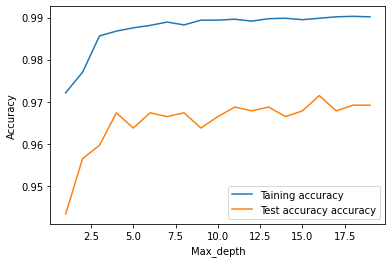

In [ ]:
import matplotlib.pyplot as plt

training_accuracy=[]
test_accuracy=[]
depth = range(1,20)
for n in depth:
  rfc = RandomForestClassifier(n_estimators=n)
  rfc.fit(x_train,y_train)
  training_accuracy.append(rfc.score(x_train,y_train))
  test_accuracy.append(rfc.score(x_test,y_test))
plt.figure(figsize=None)
plt.plot(depth,training_accuracy,label="Taining accuracy")
plt.plot(depth,test_accuracy,label="Test accuracy accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend();

In [ ]:
#Random Forest Classifier - highest accuracy
#saving the model
import pickle
pickle.dump(rf,open('phishing_website.pkl','wb'))